In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation

## Data

In [3]:
data = pd.read_csv('../data/graph_saturation_2.csv')

In [4]:
transformed = (data.iloc[:,:5] - data.mean(axis=0)[:5])/data.std(axis=0)[:5]
x_train = transformed[:400].as_matrix()
x_test = transformed[400:].as_matrix()
y_train = data.congestion[:400].as_matrix()
y_test = data.congestion[400:].as_matrix()

In [5]:
x_train.shape

(400, 5)

In [17]:
x_train[:5,:]

array([[ 0.65427349, -0.21514977,  0.57628869,  0.28031309,  0.42745368],
       [ 1.23123424, -1.50604841, -0.71583841, -0.15767611, -0.73410524],
       [-0.21116763,  0.21514977,  0.57628869,  1.59428068,  1.2018263 ],
       [ 0.07731274, -0.21514977,  1.00699772, -1.47164371,  1.58901261],
       [-1.22084895, -0.64544932, -1.57725648, -1.47164371,  1.58901261]])

In [18]:
y_train[:5]

array([ 0.07156307,  0.03589012,  0.0396125 ,  0.11083666,  0.11724117])

## Model

In [29]:
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

In [34]:
history = model.fit(x_train, y_train,batch_size=16, epochs=5, validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/5
320/320 [==============================] - 0s 424us/step - loss: 9.5211e-04 - mean_squared_error: 9.5211e-04 - val_loss: 4.1957e-04 - val_mean_squared_error: 4.1957e-04
Epoch 2/5
320/320 [==============================] - 0s 170us/step - loss: 7.3029e-04 - mean_squared_error: 7.3029e-04 - val_loss: 3.8423e-04 - val_mean_squared_error: 3.8423e-04
Epoch 3/5
320/320 [==============================] - 0s 175us/step - loss: 6.5606e-04 - mean_squared_error: 6.5606e-04 - val_loss: 3.2952e-04 - val_mean_squared_error: 3.2952e-04
Epoch 4/5
320/320 [==============================] - 0s 178us/step - loss: 6.3458e-04 - mean_squared_error: 6.3458e-04 - val_loss: 3.9698e-04 - val_mean_squared_error: 3.9698e-04
Epoch 5/5
320/320 [==============================] - 0s 174us/step - loss: 6.1698e-04 - mean_squared_error: 6.1698e-04 - val_loss: 4.2209e-04 - val_mean_squared_error: 4.2209e-04


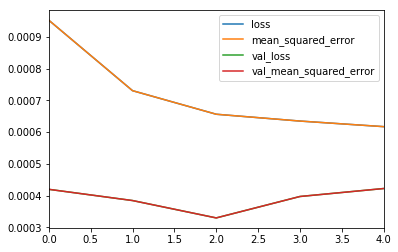

In [35]:
pd.DataFrame(history.history).plot(kind='line')
plt.show()

In [36]:
preds = model.predict(x_test)

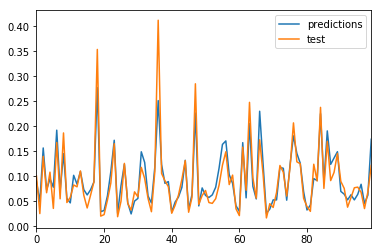

In [46]:
pd.DataFrame({'predictions': [i[0] for i in preds.tolist()], 'test': y_test}).plot(kind='line')
plt.show()